<a href="https://colab.research.google.com/github/Kimgabe/AIFFEL_Online_Quest/blob/main/Quest04/Quest04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 정의

코더 : 김양희, 김승순


[파이썬] 퀘스트: 거북이 미로찾기

난이도: ★★★☆☆

장르: ColabTurtlePlus, 함수, 조건문 활용

---

다음은 ColabTurtle을 사용하여 미로를 찾는 문제.
조건을 확인하여 거북이가 미로를 헤매지 않도록 출구를 찾아주도록 하자.

조건 :
미로는 5x5의 2차원 리스트로 주어진다.
시작 위치는 (0,0)이고 목적지는 (4,4)이다.
터틀은 상하좌우로 움직일 수 있다.
미로 내에서 갈 수 있는 길은 0으로 표시되어 있다.
터틀이 이미 지나간 길은 2로 표시해야한다.
거북이가 미로를 찾아 나가면 "미로를 찾았습니다.",
미로를 찾을 수 없으면 "미로를 찾을 수 없습니다."가 나올 수 있도록 만들어보자!

- 주석으로 구현 내용이 써있는 부분을 코드로 채워주세요!!
- 코드를 해석해주세요 부분은 코드에 대한 설명을 주석으로 써주세요!!

결과물은 다음과 같아야 합니다 :)

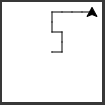

## 문제 풀이 방법
- 아래의 샘플 코드에 코드를 입력해야할 부분, 또는 주석을 달아야 할 부분에 정답을 입력하여 제출

In [2]:
!pip install ColabTurtlePlus # ColabTurtle 라이브러리 설치
from ColabTurtlePlus.Turtle import * # ColabTurtle 라이브러리에서 Turtle 클래스를 import

함수구조
- 재귀함수 구조인것 같음
- 목적지 도착 여부 확인하는 함수를 지속적으로 호출
- for문에서 길찾기 작업을 지속 시행
  - 갈수있는길(좌표값이 0인지) 확인
  - 갈수있는길이면 이동 후 좌표값 변경
  - 갔던길로 표시 -> 2로 변경
  - 갈수 없는길이면 2로 변경했던 값을 다시 0으로 바꾸고 이전 자리로 되돌아오기
  - 함수 재호출
- 의 과정을 (4,4) 에 도달할때 까지 반복

In [3]:
# 미로 데이터
maze = [
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# 시작 위치와 목적지 위치
start_x, start_y = 0, 0 # 좌표 형태로 값 입력
end_x, end_y = 4, 4

# 터틀 초기 설정
window = (100, 100)
initializeTurtle(window, 'logo')
speed(1)


# 미로 찾기 알고리즘 구현
def solve_maze(x,y):
    # 목적지에 도착한 경우 -> 조건문(목적지 좌표와 동일한 경우 True)
    if x == end_x and y == end_y:
      # "미로를 찾았습니다" 라는 문장을 출력하고
      print("미로를 찾았습니다.")

      # True를 반환한다.
      return True

    # 현재 위치에서 갈 수 있는 방향
    """
    좌표값의 의미가 뭘까..?! -> 2차원 배열의 행과 열!
    오른쪽 1칸 : (0,1) -> 열idx + 1
    왼쪽 1칸 : (0, -1) -> 행 idx -1
    아래쪽 1칸 : (1,0) -> 행 idx + 1
    위쪽 1칸 (-1, 0) -> 열 idx -1
    아래 for문은 실제 움직일 액션 부분
    dx, dy에 tuple로 list안의 값이 2개씩 할당
    dx = (0,1) , dy = (1,0) 1 set
    dx = (0,-1) , dy = (-1,0) 1 set
    """
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
    # dx = direction_x, dy = direction_y
    # nx = next_x , ny = next_y -> 이동할 좌표란 의미
      nx, ny = x + dx, y + dy

      # 미로 범위(0,0 ~ 4,4) 내에 있고, 갈 수 있는 길인 경우 -> 조건문

      if 0 <= nx < 5 and 0 <= ny < 5 and maze[nx][ny] == 0:

        # 갔던 길 표시 -> 갔던길 = 지나온길 = 다음위치 이동 직전 위치 = 현재위치
        maze[nx][ny] = 2

        pendown() # 팬 종이에 놓기
        # 다음 위치로 이동
        # window범위가 100(pixel단위) 이고 1칸 이동했으므로 각 idx값에 10 곱해서 1칸 이동
        goto(nx*10, ny*10)  # 거북이 다음 위치로 이동

        penup() # 팬 종이에서 떼기

        # 코드를 해석해주세요!!
        """
        <코드해석>
        solve_maze라는 함수를 재귀함수로 사용해 True가 나오는 값(이동할 수 있는 값 = 0)을 계속 찾는 작업을 수행
        True반환시 목적지에 도달했음을 의미하며, 재귀 호출이 종료됨
        아래 if문은 액션의 결과(목적지에 도착했는지?)를 판단하고 다음 행동을 결정할 파트.
        solve_maze(x,y) 에서 (x,y)는 거북이의 현재 위치임.
        이 현 위치에서 nx, ny 만큼 이동한 이후 이동 가능한 곳인지 판단.
        이동 가능한 곳이면 이동 후 지나온 자리를 2로 업데이트 -> 되돌아 갈 수 없게 만듦.
        이동이 불가능한 곳이면 이동을 취소하고 원래 자리로 되돌아 와서 다시 solve_maze를 재귀호출하여 탐색
        """
        # for문으로 이동 액션 이후 solve_maze호출 -> 현 위치가 미로범위안인지, 이동가능한 곳인지 파악
        if solve_maze(nx, ny):
            return True
        # 결과값이 True = 목적지 도착 / False이면 아직 도착하지 않음 = 지속 탐색(else 문 실행)
        else:
            # 다시 이전으로 돌아가기 (이동했던 만큼 다시 돌아가야 함으로 같은 값 입력)
            goto(nx*10, ny*10) # 원래 위치로 거북이를 되돌리기 위해 '이전위치'로 이동한 것
            maze[nx][ny] = 0 # 표시된 길 0표시(지우기) -> 위에 2로 업데이트한 값을 다시 0으로 -> 다른 경로 탐색시 그 길을 다시 시도하도록 하기 위함


    # 길을 찾지 못한 경우
    # "길을 찾을 수 없습니다"를 출력하고
    # False를 리턴
    print("길을 찾을 수 없습니다.")
    return False

# 실행파트
# 시작 위치에서 미로 찾기 시작
goto(start_x, start_y)
solve_maze(start_x, start_y)
import pprint
pprint.pprint(maze)

미로를 찾았습니다.
[[0, 1, 2, 2, 2],
 [2, 2, 2, 1, 2],
 [0, 1, 1, 0, 2],
 [0, 0, 1, 1, 2],
 [0, 0, 0, 0, 2]]


## 정답지 수정
- 재귀의 작동과정이 눈에 직관적으로 보이지 않고, 설명이 너무 많은 코드라서 코드를 직관적으로 이해하기 위해 각 단계별 액션을 출력하도록 print문을 추가하고 주석을 최대한 간결하게 수정
- 추가로, else문의 액션도 확인하고 싶어서 일부러 (4,4)로 갈수 없는 미로 생성

In [4]:
# 미로 데이터 else문이 출력되는 결과와 길찾기 실패를 보기 위해 일부러 (4,4)로 갈 수 없는 미로를 만듬
maze = [
    [0, 1, 0, 0, 0], # 0은 갈 수 있는 길, 1은 벽을 의미
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 0, 1, 0]
]

# 시작 위치와 목적지 위치를 설정
start_x, start_y = 0, 0 # 시작 위치는 (0,0)
end_x, end_y = 4, 4 # 목적지 위치는 (4,4)

# 터틀 초기 설정 : 터틀 그래픽 윈도우의 크기와 속도를 설정
window = (100, 100) # 윈도우 크기를 100x100으로 설정
initializeTurtle(window, 'logo') # 터틀을 초기화
speed(1) # 터틀의 속도를 설정 (1은 가장 느린 속도)

# 미로 찾기 알고리즘을 정의한 함수
def solve_maze(x, y):
    # 만약 현재 위치가 목적지(4,4)와 같다면, 미로를 찾았다는 메시지를 출력하고 True를 반환
    if x == end_x and y == end_y:
        print("미로를 찾았습니다.")
        return True

    # 현재 위치에서 이동할 수 있는 네 방향을 검사
    directions = [(0, 1, '오른쪽'), (1, 0, '아래'), (0, -1, '왼쪽'), (-1, 0, '위')]
    for dx, dy, direction in directions:
    #for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = x + dx, y + dy # 다음 위치를 계산

        # 만약 다음 위치가 미로 범위 내에 있고 갈 수 있는 길이라면(즉, maze[nx][ny]가 0이라면),
        # 다음 위치로 이동
        if 0 <= nx < 5 and 0 <= ny < 5 and maze[nx][ny] == 0:
            print(f"이동 시도: 현재 위치 ({x}, {y}) -> 다음 위치 ({nx}, {ny}), 방향: {direction}")
            maze[nx][ny] = 2 # 다음 위치를 '이미 지나간 길(문제에서 2로 지정)'로 표시

            pendown() # 종이에 펜을 내린다.
            goto(nx*10, ny*10) # 터틀을 다음 위치로 이동시킨다.

            penup() # 터틀의 펜을 종이에서 뗀다.

            # 재귀적으로 다음 위치에서 미로 찾기를 계속 진행
            if solve_maze(nx, ny):
                return True # 길을 찾으면 True를 반환
            else:
                # 길을 찾지 못한 경우, 다시 원래 위치로 돌아감
                print(f"막힘: 다음 위치 ({nx}, {ny}) -> 되돌아감 ({x}, {y}), 방향: {direction}")
                goto(x*10, y*10) # 터틀을 원래 위치로 이동
                maze[nx][ny] = 0 # 지나온 길을 다시 '갈 수 있는 길'로 표시
                # 0으로 바꾸는 이유는 해당 위치에서 '한방향' 으로만 시도했으므로, 나머지 방향에 대한 시도를 하도록 하기 위함

    # 모든 방향을 검사했음에도 길을 찾지 못했다면, 실패 메시지를 출력하고 False를 반환
    print(f"길을 찾을 수 없습니다: 현재 위치 ({x}, {y})")
    return False

# 실행 파트: 시작 위치에서 미로 찾기를 시작합니다
# 시작 위치에서 미로 찾기 시작
goto(start_x, start_y)
solve_maze(start_x, start_y)
import pprint
pprint.pprint(maze)

이동 시도: 현재 위치 (0, 0) -> 다음 위치 (1, 0), 방향: 아래
이동 시도: 현재 위치 (1, 0) -> 다음 위치 (1, 1), 방향: 오른쪽
이동 시도: 현재 위치 (1, 1) -> 다음 위치 (1, 2), 방향: 오른쪽
이동 시도: 현재 위치 (1, 2) -> 다음 위치 (0, 2), 방향: 위
이동 시도: 현재 위치 (0, 2) -> 다음 위치 (0, 3), 방향: 오른쪽
이동 시도: 현재 위치 (0, 3) -> 다음 위치 (0, 4), 방향: 오른쪽
이동 시도: 현재 위치 (0, 4) -> 다음 위치 (1, 4), 방향: 아래
이동 시도: 현재 위치 (1, 4) -> 다음 위치 (2, 4), 방향: 아래
이동 시도: 현재 위치 (2, 4) -> 다음 위치 (2, 3), 방향: 왼쪽
길을 찾을 수 없습니다: 현재 위치 (2, 3)
막힘: 다음 위치 (2, 3) -> 되돌아감 (2, 4), 방향: 왼쪽
길을 찾을 수 없습니다: 현재 위치 (2, 4)
막힘: 다음 위치 (2, 4) -> 되돌아감 (1, 4), 방향: 아래
길을 찾을 수 없습니다: 현재 위치 (1, 4)
막힘: 다음 위치 (1, 4) -> 되돌아감 (0, 4), 방향: 아래
길을 찾을 수 없습니다: 현재 위치 (0, 4)
막힘: 다음 위치 (0, 4) -> 되돌아감 (0, 3), 방향: 오른쪽
길을 찾을 수 없습니다: 현재 위치 (0, 3)
막힘: 다음 위치 (0, 3) -> 되돌아감 (0, 2), 방향: 오른쪽
길을 찾을 수 없습니다: 현재 위치 (0, 2)
막힘: 다음 위치 (0, 2) -> 되돌아감 (1, 2), 방향: 위
길을 찾을 수 없습니다: 현재 위치 (1, 2)
막힘: 다음 위치 (1, 2) -> 되돌아감 (1, 1), 방향: 오른쪽
길을 찾을 수 없습니다: 현재 위치 (1, 1)
막힘: 다음 위치 (1, 1) -> 되돌아감 (1, 0), 방향: 오른쪽
이동 시도: 현재 위치 (1, 0) -> 다음 위치 (2, 0), 방향: 아래
이동 시도: 현재 위치 (2, 0

## 시행착오

- 처음에 문제 이해를 하기 위해 많은 시간 소요
- 특히 2차원 배열 및 배열에 대한 접근, dx, dy의 범위지정 이유 등
- 이후 for문 아래 조건문 정의 하는 파트에서 조건 설정을 잘못하여 시행착오를 겪음
  - `if 0 <= nx < 5 and 0 <= ny < 5 and maze[nx][ny] == 0:` 가 올바른 코드인데
  - `if 0 <= nx < 5 and 0 <= ny < 5 and nx == 0 and ny == 0 and maze[nx][ny] == 0:` 로 작성하여 if문 자체가 계속 False가 되어 solve_maze()가 재귀하지 못하고 바로 종료되는 현상 발생

- + for문 내부에 지나온길을 '2' 로 업데이트하는 코드에서 '='잘 못작성하여 if문이 지속적으로 False가 되어 solve_maze()가 재귀하지 못하고 바로 종료되는 현상 발생을 또 겪음
```ptyhon
# 갔던 길 표시
maze[nx][ny] = 2 # 0을 2로 update ## '==' 로 썼었음!!!
```



## 회고

### 김양희

KEEP
- 코드 작성에 필요한 turtle메서드인 goto(), penup(), pendown() 등을 구글링하여 활용하였다.

PROBLEM
- `def solve_maze(x,y)`에서의 x, y와 `for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:` 구문의 의미를 이해하기 어려웠다.
- 예를 들어 2차원 리스트에서의 인덱싱은 리스트명[행][열]로 알고 있는데 다르게 표현된 for문에서 이해하기 어려웠다.

TRY
- 페어하는 동료 그루의 설명으로 1차적인 이해가 되었으나, 처음부터 끝까지 다시 한 번 혼자 작성해보면서 완전히 습득해야겠다.



### 김승순

KEEP
- 문제 내용을 파악하고, 샘플 코드의 풀이 과정을 이해하고 빈칸 채우기에 접근했다.

PROBLEM
- '='를 '=='로 입력한다던가 하는 잔실수가 많았다.
- 페어 프로그래밍인데 너무 혼자 문제를 빨리 풀려고 혼자 생각해두고, 그대로만 풀이를 접근하려고 한게 아닌가 싶다.

TRY
- 페어하는 동료 그루와 의견 교류를 더 많이 하고, 풀이 과정에 대한 논의를 하고 시작해야겠다.